In [54]:
import os, sys
import numpy as np
import cv2
import argparse

def center_crop(image,out_height,out_width):
  input_height, input_width = image.shape[:2]
  offset_height = (input_height - out_height) // 2
  offset_width = (input_width - out_width) // 2
  image = image[offset_height:offset_height+out_height, offset_width:offset_width+out_width,:]
  return image


def resize_maintain_aspect(image,target_h,target_w):
  input_height, input_width = image.shape[:2]
  if input_height > input_width:
    new_width = target_w
    new_height = int(input_height*(target_w/input_width))
  else:
    new_height = target_h
    new_width = int(input_width*(target_h/input_height))

  image = cv2.resize(image,(new_width,new_height),interpolation=cv2.INTER_CUBIC)
  return image



def images_to_npy(image_dir,label_file,classes,input_height,input_width,input_chans,resize,normalize,one_hot,compress,output_file):

  # open & read text file that lists all images and their labels
  f = open(label_file, 'r') 
  listImages = f.readlines()
  f.close()

  # make image placeholder array - float32 if resizing and/or normalizing
  if normalize:
    x = np.ndarray(shape=(len(listImages),input_height,input_width,input_chans), dtype=np.float32, order='C')
  else:
    x = np.ndarray(shape=(len(listImages),input_height,input_width,input_chans), dtype=np.uint8, order='C')

  # make labels placeholder array
  if (one_hot):
    y = np.ndarray(shape=(len(listImages),classes), dtype=np.uint8, order='C')
  elif(classes<=256):
    y = np.ndarray(shape=(len(listImages)), dtype=np.uint8, order='C')
  elif(classes<=65536):
    y = np.ndarray(shape=(len(listImages)), dtype=np.uint16, order='C')
  else:
    y = np.ndarray(shape=(len(listImages)), dtype=np.uint32, order='C')



  for i in range(len(listImages)):

    image_name,label = listImages[i].split()

    # open image to numpy array and switch to RGB from BGR
    img = cv2.imread(os.path.join(image_dir,image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # optionally resize & center crop
    if resize:
      img = resize_maintain_aspect(img,input_height,input_width)
      img = center_crop(img,input_height,input_width)
    
    # optionally normalize then write into placeholder array
    if normalize:
      x[i] = (img/255.0).astype(np.float32)
    else:
      x[i] = img

    # optionally 1-hot encode the label, then write into placeholder array
    if (one_hot):
      label_1hot = np.zeros(classes,dtype=np.uint32,order='C')
      np.put(label_1hot,int(label),1)
      y[i] = label_1hot
    else:
      y[i] = int(label)


  # report data types used
  print(' x shape:',x.shape)
  print(' x data type:',x[0].dtype)
  print(' y shape:',y.shape)
  print(' y data type:',y[0].dtype)


  # write output file
  if (compress):
    np.savez_compressed(output_file, x=x, y=y)
  else:
    np.savez(output_file, x=x, y=y)

  print(' Saved to',output_file)

  return  


In [55]:
import cv2
import numpy
image=cv2.imread('cloud_type/train_masks_1050/train_masks_1050/Fish0a7a247.jpg')


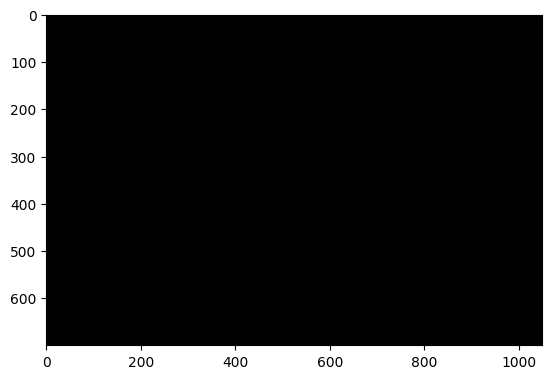

In [56]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.show()

In [57]:
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


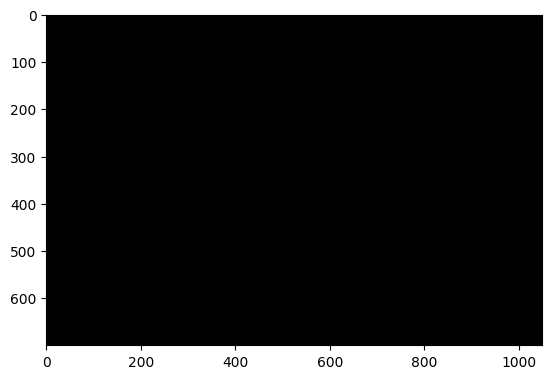

In [58]:
plt.imshow(image)
plt.show()

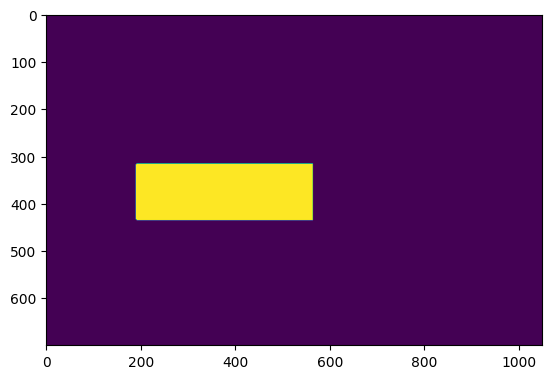

In [73]:
import cv2
image=cv2.imread('cloud_type/train_masks_1050/train_masks_1050/Fish0cf1dcc.jpg')
#COLOR SPACE USED BY THE CV2 LIBRARY IS BGR BY DEFAULT BUT WE HAVE AN RGB COLOR SPACE SO WE NEED TO CONVERT THEM FIRST AS FOLLOWS
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
# BGR2GRAY  IT IS IMPORTANT BECAUSE IT DECOMPOSES THE IMAGE INTO 1 DIMENTIONS 
plt.show()

In [60]:
import numpy as np 
print(image.shape)

(700, 1050, 3)


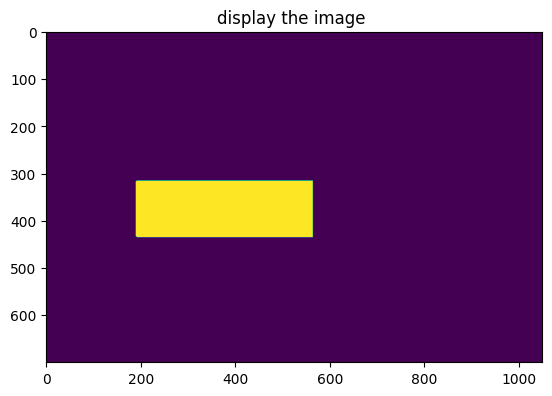

In [5]:
# nameing the image before being displayed 
import cv2
import matplotlib.pyplot as plt
image=cv2.imread('cloud_type/test_images_1050/00a7177.jpg')

# to save images as and rename
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
plt.title("display the image ")
plt.show()

In [62]:
#height of image\
print(image.shape[0]) 
#width of image 
print(image.shape[1])
#depth of image 
print(image.shape[2])


700
1050
3


In [63]:
#COLOR SPACES
#VIEW INDIVIDUAL CHANNELS OF THE RGB IMAGE
#INRODUCTION TO HSV COLOR SPACES
def imshow(title = "imshow", image=None ,size = 10):
    w,h=image.shape[0], image.shape[1]
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [64]:
image=cv2.imread('cloud_type/train_images_1050/train_images_1050/0a1b596.jpg')
B,G,R=cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(700, 1050)
(700, 1050)
(700, 1050)


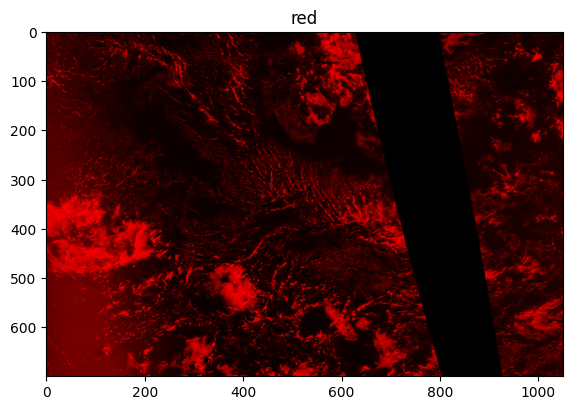

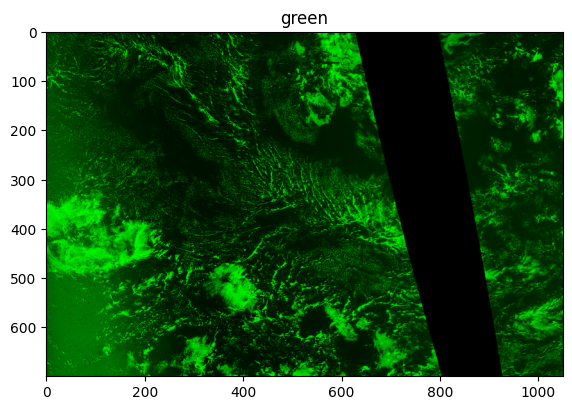

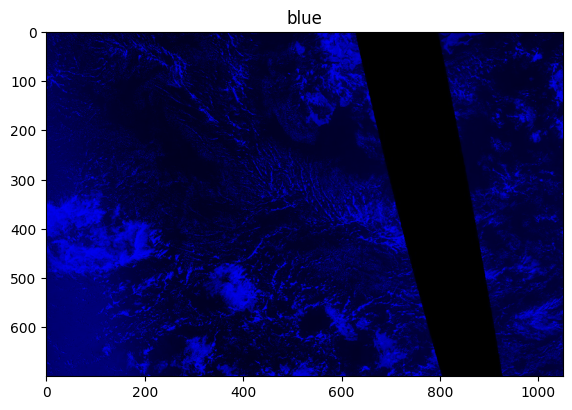

In [65]:
import matplotlib.pyplot as plt 
zeros = np.zeros(image.shape[:2],dtype="uint8")
imshow("red", cv2.merge([zeros,zeros,R]))
imshow("green", cv2.merge([zeros,G,zeros]))
imshow("blue", cv2.merge([B,zeros,zeros]))

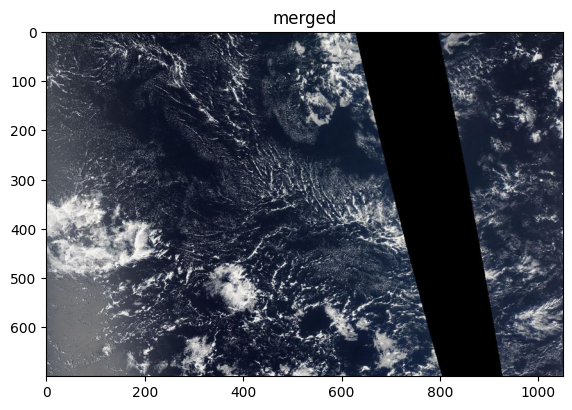

In [66]:
merged=cv2.merge([B,G,R])
imshow("merged",merged)

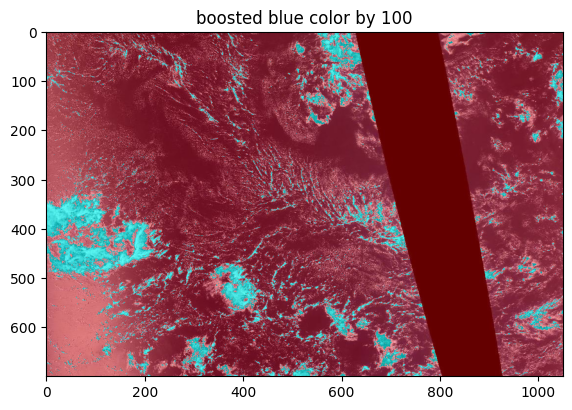

In [67]:
merged=cv2.merge([B,G,R+100])
imshow("boosted blue color by 100",merged)

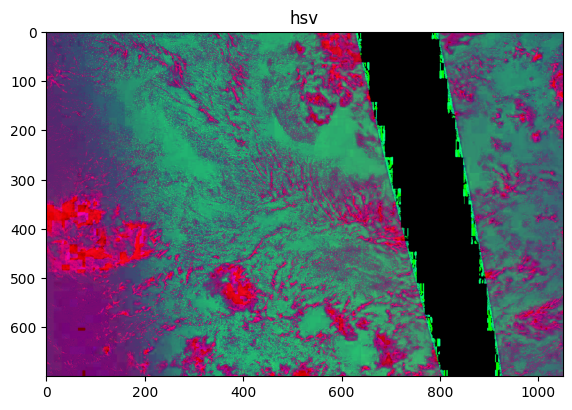

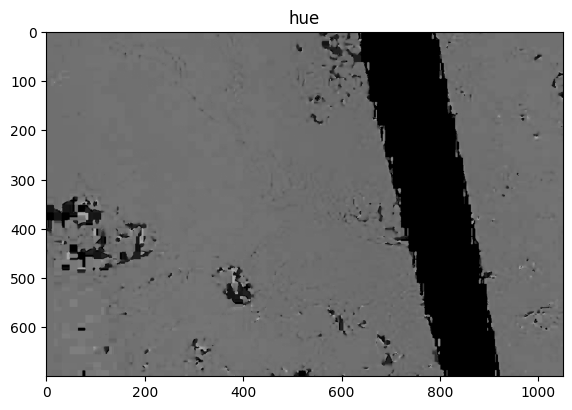

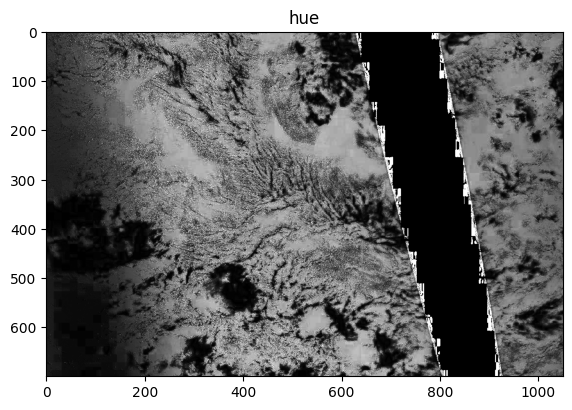

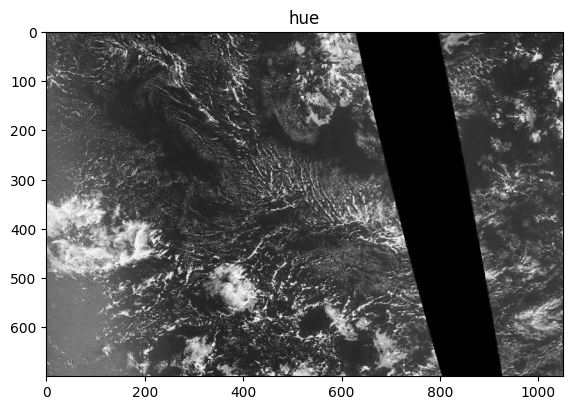

In [72]:
#seeing each channels of HSV
hsv_image=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('hsv', hsv_image)
imshow("hue", hsv_image[:,:,0])
imshow("hue", hsv_image[:,:,1])
imshow("hue", hsv_image[:,:,2])
